# KL Divergence

Below I will show code for calculating the KL Divergence between two Gaussian distributions. In order to make this practical to calculate, I have binned the normal distributions, thus making it discrete.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

For a pair discrete distributions $p$ amd $q$, the KL divergence can be expressed as:

$$D_{KL}(p\|q)=\sum^K_{k=1}{p_k\log\frac{p_k}{q_k}}$$

For continuous distributions, the equation is similar except the sum is an intergral.

In [ ]:
def kl_divergence(p, q):
    kl_sum = 0
    for x, _ in enumerate(p):
        if p[x] != 0 and q[x] != 0:
            kl_sum += np.nan_to_num(p[x] * np.log(p[x] / q[x]))

    return kl_sum

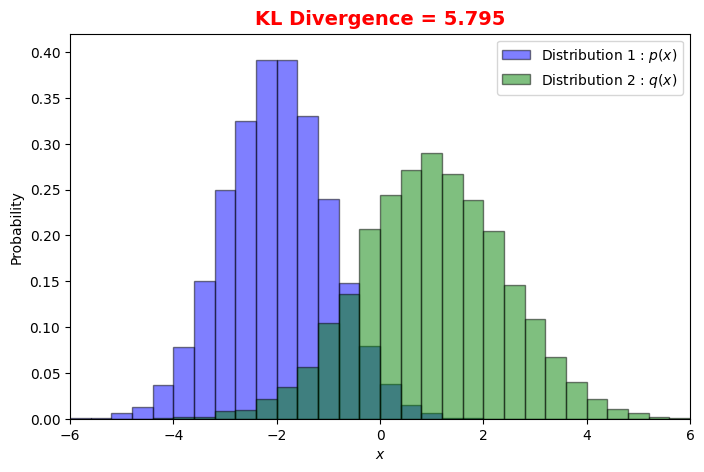

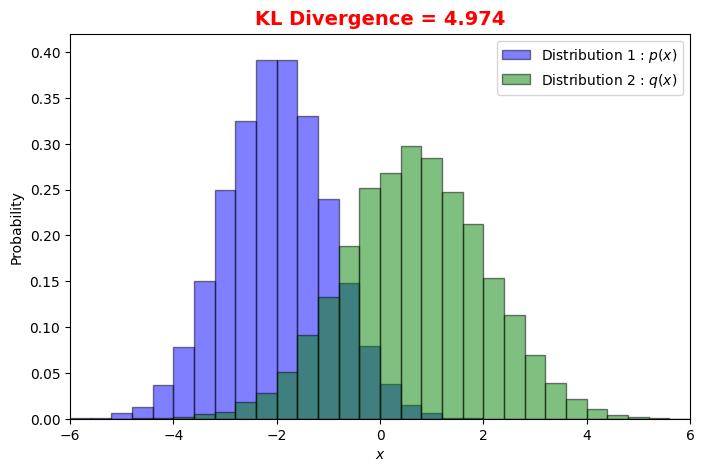

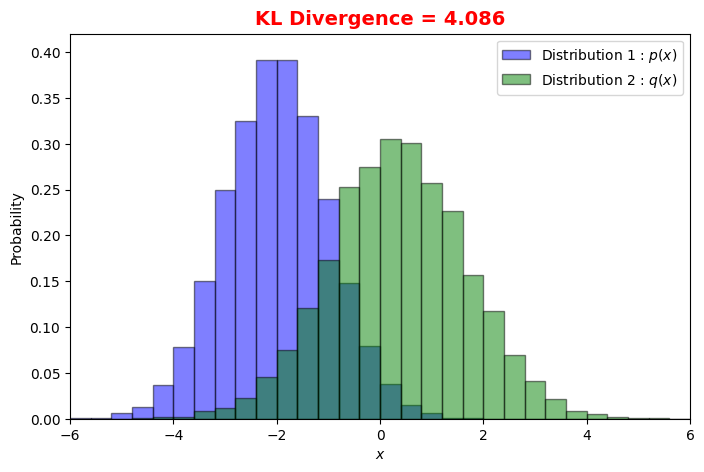

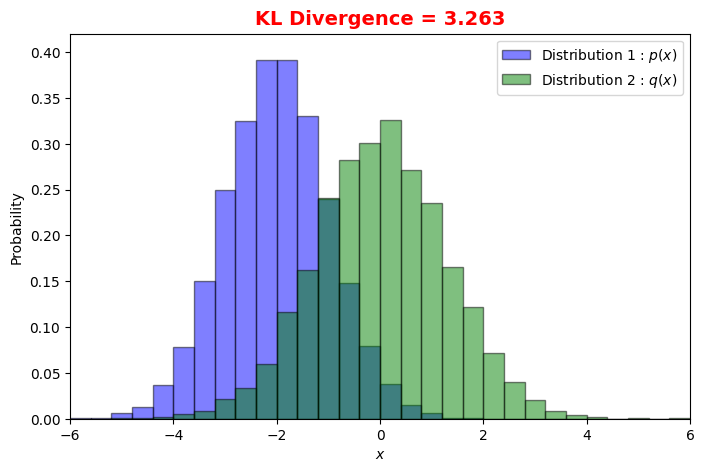

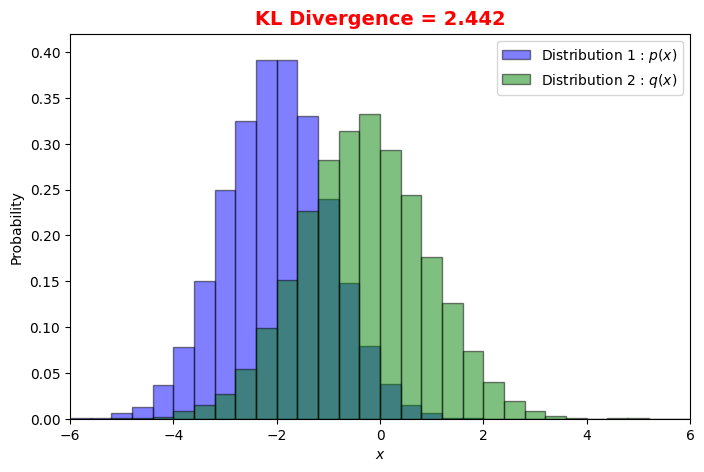

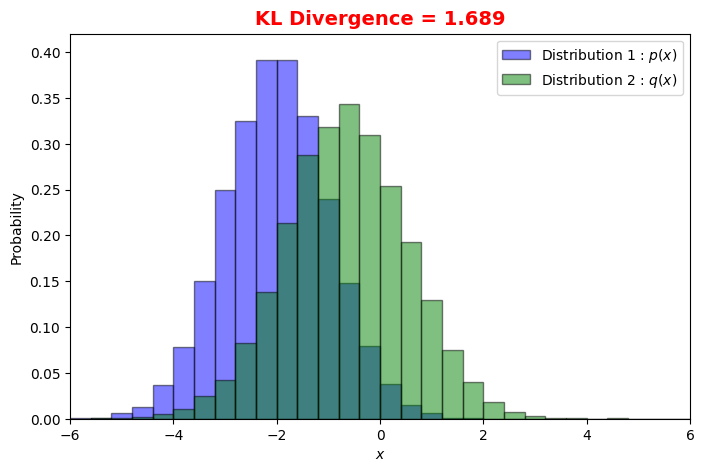

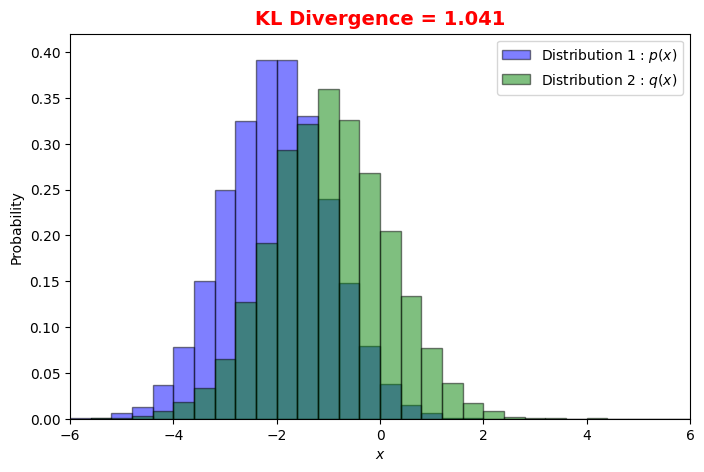

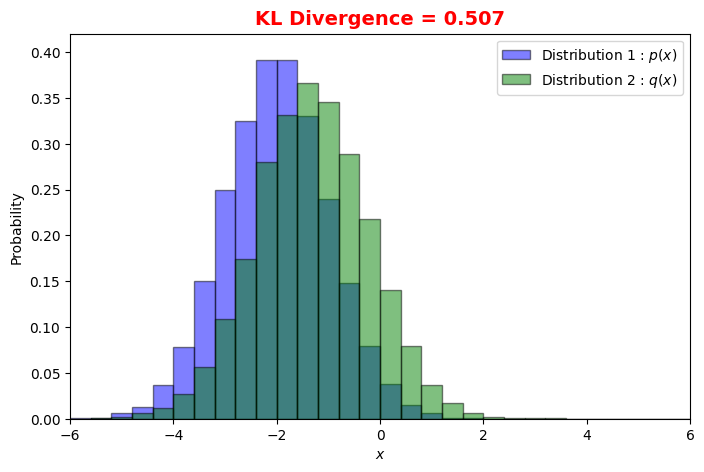

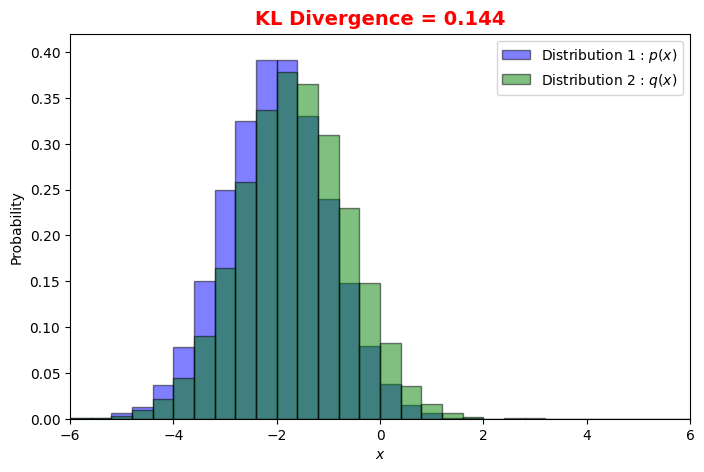

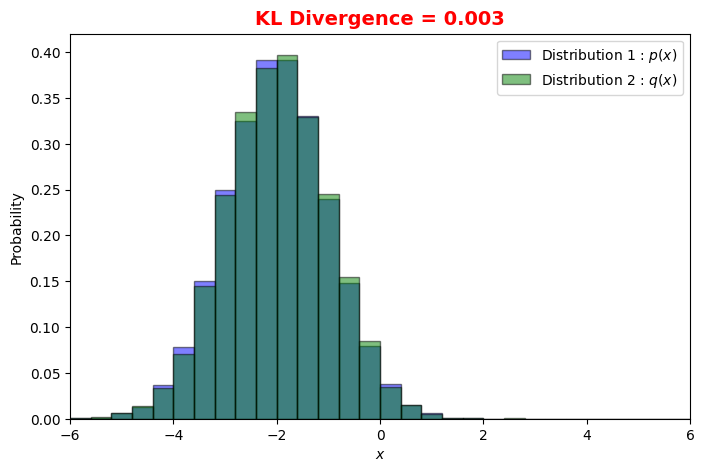

In [ ]:
# Set random seed for reproducibility
total_iterations = 10
for it in range(total_iterations):
    np.random.seed(42)

    # Parameters for the first mixture of Gaussian distributions
    mean1_1, std1_1, weight1_1 = -2, 1, 0.6  # First Gaussian in mixture 1

    # Parameters for the second mixture of Gaussian distributions
    mean2_1, std2_1, weight2_1 = 1 - (it*3/(total_iterations-1)), 1.4 - (it*0.4/(total_iterations-1)), 0.5  # First Gaussian in mixture 2

    # Generate samples for mixture 1
    n_samples = 10000
    samples1 = np.random.normal(mean1_1, std1_1, n_samples)

    # Generate samples for mixture 2
    samples2 = np.random.normal(mean2_1, std2_1, n_samples)

    # Plot the distributions
    plt.figure(figsize=(8, 5))

    # Plot histograms for both mixtures
    plt.hist(samples1, bins=30, density=True, range=[-6,6], alpha=0.5, label='Distribution 1 : $p(x)$', color='blue', edgecolor='black')
    plt.hist(samples2, bins=30, density=True, range=[-6,6], alpha=0.5, label='Distribution 2 : $q(x)$', color='green', edgecolor='black')

    # Calculate KL Divergence
    p = np.histogram(samples1, bins=30, density=True, range=[-6,6])[0]
    q = np.histogram(samples2, bins=30, density=True, range=[-6,6])[0]
    kl = kl_divergence(p, q)

    # Add labels and title
    plt.xlim([-6,6])
    plt.ylim([0,0.42])
    plt.xlabel('$x$')
    plt.ylabel('Probability')
    plt.text(0, 0.43, 'KL Divergence = ' + str(round(kl, 3)), fontsize=14, horizontalalignment='center',fontweight='bold', color='red')

    plt.legend(loc='upper right')

    # Show the plot
    plt.show()


# Mutual Information

Below I have added some visualization expressing some of the intuition behind mutual information. Mutual information between two random variables X and Y is defined as:
$$ D_{KL}(p(x,y)\|p(x)p(y)) = \sum_{y\in Y}\sum_{x\in X}{p(x,y)\log\frac{p(x,y)}{p(x)p(y)}}$$

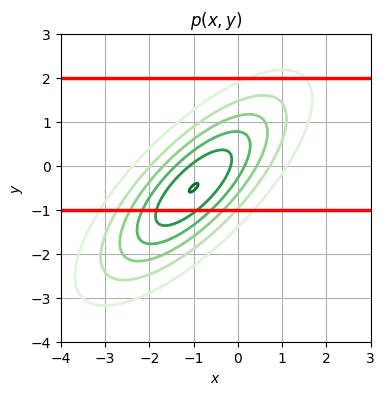

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Define the mean and covariance matrix
m1 = np.array([-1, -0.5])
C1 = np.array([[2, 1.5], [1.5, 2]], np.float32)

# Create a grid of points
x, y = np.mgrid[-4:4:.01, -4:4:.01]
pos = np.dstack((x, y))

# Create the multivariate normal distribution
rv = multivariate_normal(m1, C1)

# Calculate the probability density function on the grid
z = rv.pdf(pos)

# Create the contour plot
plt.figure(figsize=(4, 4))
plt.contour(x, y, z, levels=6, cmap='Greens', linewidths=2)

# Set labels and title
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('$p(x,y)$')
plt.axhline(y=-1, color='r', linestyle='-', linewidth=2.5, label='Horizontal Line')
plt.axhline(y=2, color='r', linestyle='-', linewidth=2.5, label='Horizontal Line')
plt.grid()

# Set x and y limits
plt.xlim(-4, 3)
plt.ylim(-4, 3)

# Show the plot
plt.show()


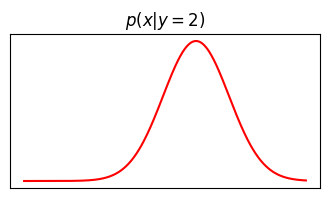

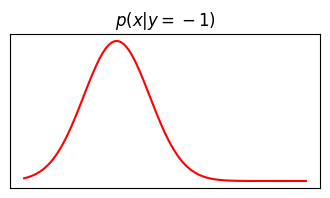

In [ ]:
plt.figure(figsize=(4, 2))
plt.plot(z[:,600], c='r')
plt.title('$p(x|y=2)$')
plt.xticks([])
plt.yticks([])
plt.show()

plt.figure(figsize=(4, 2))
plt.plot(z[:,300], c='r')
plt.title('$p(x|y=-1)$')
plt.xticks([])
plt.yticks([])
plt.show()